In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [26]:
dataset=pd.read_excel(r"C:\Users\ASUS\OneDrive\Desktop\Placed or not.xlsx")
dataset.head()

,CGPA,TestScore,Placed
0,8.5,82,1
1,7.2,65,1
2,6.8,58,0
3,9.1,91,1
4,5.9,45,0


In [28]:
# Check Mull values 
dataset.isnull().sum()


CGPA         0
TestScore    0
Placed       0
dtype: int64

<Axes: >

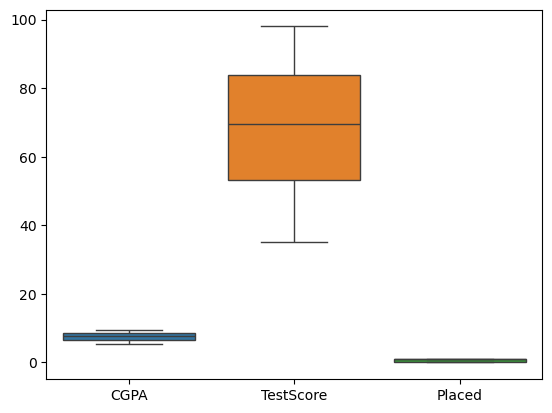

In [30]:
# Checking Outlier 
sns.boxplot(dataset)

<Axes: xlabel='Placed', ylabel='Count'>

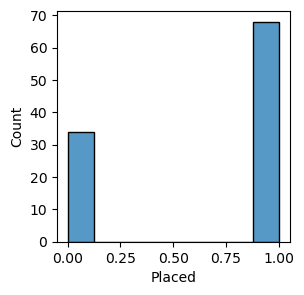

In [38]:
# HIstogram
plt.figure(figsize=(3,3))
sns.histplot(dataset["Placed"])

# Random Over sampling

In [41]:
from imblearn.over_sampling import RandomOverSampler

In [43]:
ros=RandomOverSampler()

In [45]:
# Split trhe data set into x and y 
x=dataset.iloc[:,:-1]
y=dataset["Placed"]

In [47]:
ros.fit(x,y)

RandomOverSampler()

In [51]:
ros_x,ros_y=ros.fit_resample(x,y)

In [62]:
df=pd.DataFrame(np.column_stack((ros_x,ros_y)),columns=dataset.columns)
df.head()

,CGPA,TestScore,Placed
0,8.5,82.0,1.0
1,7.2,65.0,1.0
2,6.8,58.0,0.0
3,9.1,91.0,1.0
4,5.9,45.0,0.0


In [64]:
df["Placed"].value_counts()

Placed
1.0    68
0.0    68
Name: count, dtype: int64

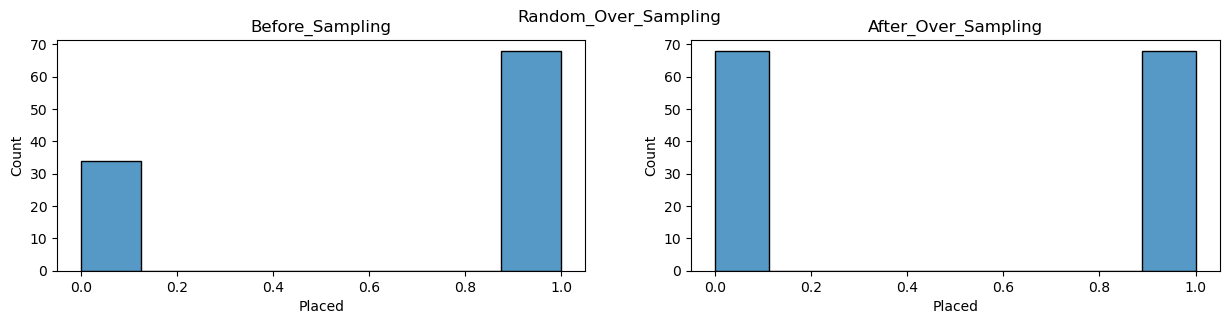

In [86]:
fig,axes=plt.subplots(1,2,figsize=(15,3))
plt.suptitle("Random_Over_Sampling")
sns.histplot(dataset["Placed"],ax=axes[0])
axes[0].set_title("Before_Sampling")
sns.histplot(df["Placed"],ax=axes[1])
axes[1].set_title("After_Over_Sampling")
plt.show()